For n_clusters = 20 The average silhouette_score is : 0.3340184257928483


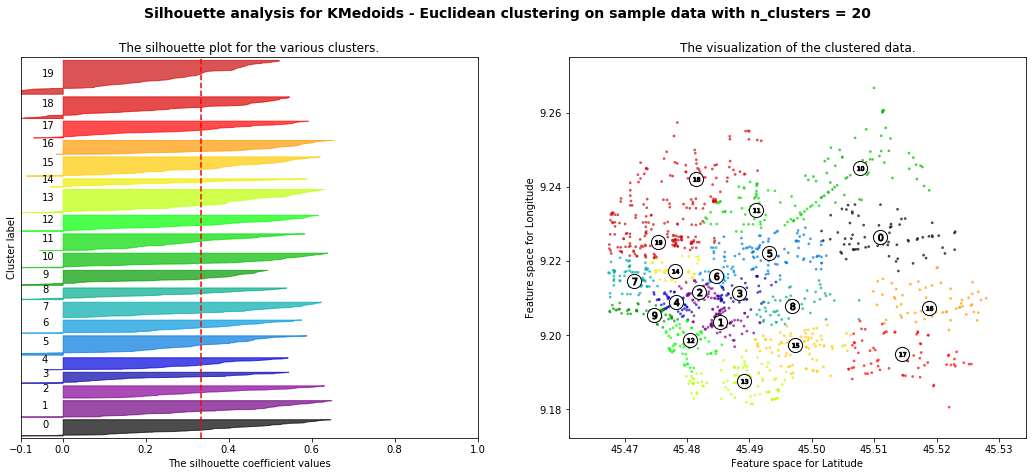

In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from importlib import reload

import a2a_clustering
import a2a_validation
import a2a_travellingsalesman

a2a_clustering = reload(a2a_clustering)
a2a_validation = reload(a2a_validation)
a2a_travellingsalesman = reload(a2a_travellingsalesman)

###################
# CLUSTERING STEP #
###################

n_clusters = 20
RANDOM_SEED = 0

PATH = 'output/clustering/'
FILE_PREFIX = PATH + 'kmedoids_' + str(n_clusters) + '_euclidean_'

df = pd.read_csv("output/data_preparation/first_visit.20190903.csv",
    parse_dates=['created_at'], date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

X = a2a_clustering.transform(df)

clusterer = KMedoids(
    n_clusters = n_clusters, 
    random_state = RANDOM_SEED, 
    metric = "euclidean" ).fit(X)

cluster_labels = clusterer.labels_ 
df = df.assign(**{
    'Cluster_labels': cluster_labels
})

centroid_csv = np.asarray(clusterer.cluster_centers_)
np.savetxt(FILE_PREFIX + "centroids.csv", 
    centroid_csv, 
    header="lat,lng", 
    delimiter=",", 
    comments='')

###################
# VALIDATION STEP #
###################

df = a2a_validation.silhouette(df, clusterer.cluster_centers_, FILE_PREFIX, "KMedoids - Euclidean")
df.to_csv(FILE_PREFIX + "clusterized_dataset.csv")

###################
# TSP        STEP #
###################

tsp_solved = a2a_travellingsalesman.tsp(df, FILE_PREFIX)
tsp_solved.to_csv(FILE_PREFIX + 'tsp.csv')

In [6]:
tsp_solved

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,33230.100,33 Km 230.10 m.,1:07:37,2:16:37,4057.800,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,26058.800,26 Km 58.80 m.,1:01:28,2:11:28,3688.400,70.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,19055.899,19 Km 55.90 m.,0:40:15,1:32:15,2415.100,52.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,21301.400,21 Km 301.40 m.,0:49:11,1:36:11,2951.600,47.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,21259.500,21 Km 259.50 m.,0:47:20,1:38:20,2840.200,51.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,31265.899,31 Km 265.90 m.,1:02:24,2:24:24,3744.600,82.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,18589.399,18 Km 589.40 m.,0:40:00,1:36:00,2400.300,56.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,27190.999,27 Km 191.00 m.,1:02:17,2:07:17,3737.000,65.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,28669.099,28 Km 669.10 m.,1:04:06,1:54:06,3846.600,50.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,24793.599,24 Km 793.60 m.,0:50:05,1:54:05,3005.400,64.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
